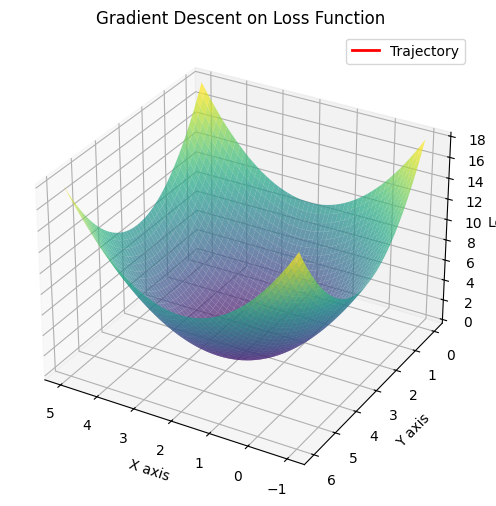

In [1]:
''''''''''''''''''''
'''    梯度下降    '''      
''''''''''''''''''''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 自定义损失函数
def loss_function(x, y):
    return (x - 2) ** 2 + (y - 3) ** 2

# 对自定义损失函数的手动梯度计算
def gradient(x, y):
    partial_x = 2 * (x - 2)
    partial_y = 2 * (y - 3)
    return partial_x, partial_y

# 梯度下降算法
def gradient_descent(x, y, learning_rate=0.1, num_iterations=50):
    trajectory = [(x, y, loss_function(x, y))]
    for _ in range(num_iterations):
        grad_x, grad_y = gradient(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        trajectory.append((x, y, loss_function(x, y)))
    return np.array(trajectory)

# 参数初始化
x, y =  0, 0    # 初始点
lr = 0.1        # 学习率
num_iters = 50  # 迭代次数
trajectory = gradient_descent(x, y, learning_rate=lr, num_iterations=num_iters)

# 生成网格
x_vals = np.linspace(-1, 5, 400) # 这里决定了网格的范围，你可以调整参数
y_vals = np.linspace(0, 6, 400) 
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_function(X, Y)

# 创建3D图形
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7) 

# 设置标签和标题
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Loss")
ax.set_title("Gradient Descent on Loss Function")

# 设置视角
ax.view_init(elev=30, azim=120)
# 初始化轨迹线和点
(trajectory_line,) = ax.plot([], [], [], color="red", linewidth=2, label="Trajectory")
(point,) = ax.plot([], [], [], "ro")  # 当前点

# 更新动画的函数
def update(frame):
    trajectory_line.set_data(trajectory[: frame + 1, 0], trajectory[: frame + 1, 1])
    trajectory_line.set_3d_properties(trajectory[: frame + 1, 2])

    # 更新当前点
    point.set_data([trajectory[frame, 0]], [trajectory[frame, 1]])
    point.set_3d_properties([trajectory[frame, 2]])

    # 更新视角
    ax.view_init(elev=30, azim=120 - frame * 2) # 旋转视角

    return trajectory_line, point

'''
trajectory_line.set_data(trajectory[:, 0], trajectory[:, 1])
trajectory_line.set_3d_properties(trajectory[:, 2])
point.set_data([trajectory[-1, 0]], [trajectory[-1, 1]])
point.set_3d_properties([trajectory[-1, 2]])
# 更新视角
ax.view_init(elev=30, azim=120)
'''

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=200, blit=False)
ax.legend()
plt.show()  
# 理论上应该显示一个旋转的动画，但是在jupyter notebook中无法显示
# 取消ani赋值会弹出warning信息，猜测是因为cell运行结束导致所有进程关闭，使得动画无法持续渲染



Accuracy of K-Means clustering: 0.83
Cluster Composition: {np.int32(0): np.int64(53), np.int32(1): np.int64(50), np.int32(2): np.int64(47)}


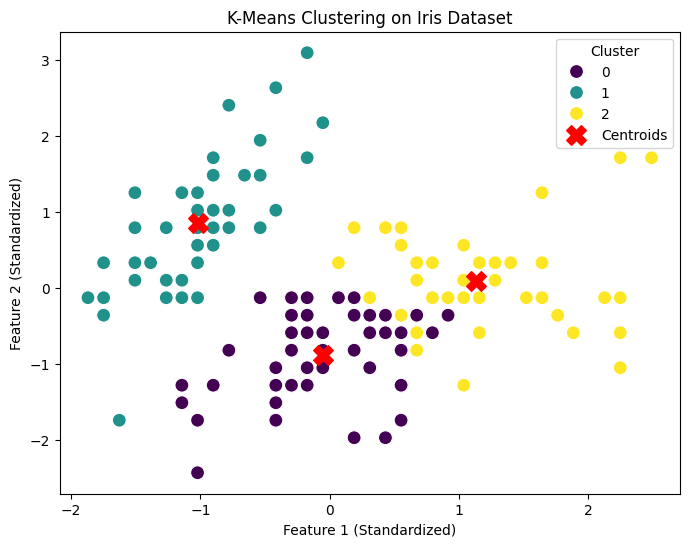

The sample data [[5.1 3.5 1.4 0.2]] is predicted to belong to cluster 1


In [2]:
''''''''''''''''''''
'''   鸢尾花聚类   '''      
''''''''''''''''''''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# 第一步：加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data # 特征矩阵
y = iris.target # 真实标签

# 第二步：数据预处理（标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 第三步：训练K-Means模型
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# 获取聚类标签
cluster_labels = kmeans.labels_

# 第四步：将聚类标签映射到实际类别标签
# 由于K-Means分配任意的聚类编号，我们需要将它们映射到实际类别
mapped_labels = np.zeros_like(cluster_labels)
for i in range(3): # 对每个聚类
    mask = cluster_labels == i
    mapped_labels[mask] = mode(y[mask], keepdims=True).mode[0]
    # 修正：确保数组输出
    
# 第五步：计算准确率
accuracy = accuracy_score(y, mapped_labels)
print(f"Accuracy of K-Means clustering: {accuracy:.2f}")

# 第六步：显示聚类组成
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_composition = dict(zip(unique, counts))
print("Cluster Composition:", cluster_composition)

# 第七步：可视化聚类
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis", s=100)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    marker="X",
    s=200,
    label="Centroids"
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster")
plt.show()

# 第八步：用新样本测试模型
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])
 # 示例鸢尾花样本
sample_scaled = scaler.transform(sample_data)
predicted_cluster = kmeans.predict(sample_scaled)

print(f"The sample data {sample_data} is predicted to belong to cluster {predicted_cluster[0]}")

Principal Component 1: 72.96% variance explained
Principal Component 2: 22.85% variance explained
Principal Component 3: 3.67% variance explained
Principal Component 4: 0.52% variance explained


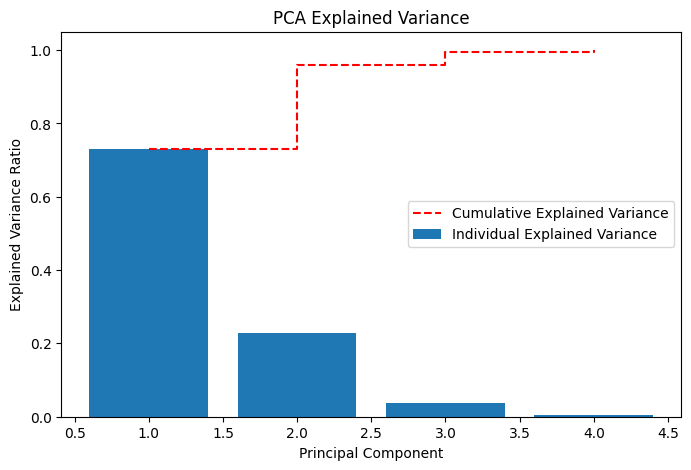

In [4]:
''''''''''''''''''''
'''   鸢尾花降维   '''      
''''''''''''''''''''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 第一步：加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data # 特征矩阵
y = iris.target # 真实标签

# 第二步：标准化特征（对PCA很重要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 第三步：应用PCA
pca = PCA(n_components=4) # 保留所有4个成分以分析解释的方差
X_pca = pca.fit_transform(X_scaled)

# 第四步：分析主成分
explained_variance = pca.explained_variance_ratio_  # 每个成分解释的方差
cumulative_variance = np.cumsum(explained_variance)  # 累积方差
# 打印每个成分解释的方差
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.2%} variance explained")

# 第五步：绘制解释的方差
plt.figure(figsize=(8, 5))
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    align="center",
    label="Individual Explained Variance",
)
plt.step(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    where="post",
    linestyle="--",
    color="red",
    label="Cumulative Explained Variance",
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance")
plt.legend()
plt.show()

In [ ]:
# 装箱子问题
def box_packing(boxes, capacity):
    """
    装箱子问题求解。
    参数：
        boxes: 每个箱子的重量列表
        capacity: 箱子的最大容量
    返回：
        最少需要的箱子数量
    """
    boxes.sort(reverse=True)  # 按重量降序排序
    bins = []
    for box in boxes:
        placed = False
        for b in bins:
            if sum(b) + box <= capacity:
                b.append(box)
                placed = True
                break
        if not placed:
            bins.append([box])
    return len(bins)

# 示例
boxes = [4, 8, 1, 4, 2, 1]
capacity = 10
print(f"最少需要的箱子数量: {box_packing(boxes, capacity)}")

最少需要的箱子数量: 2


In [ ]:
# 用动态规划实现斐波那契数列求解
def fibonacci_dp(n):
    """
    用动态规划求解斐波那契数列。
    参数：
        n: 第 n 项
    返回：
        第 n 项的值
    """
    if n <= 1:
        return n
    dp = [0] * (n + 1)
    dp[1] = 1
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]

# 示例
n = 10
print(f"斐波那契数列第 {n} 项的值: {fibonacci_dp(n)}")

斐波那契数列第 10 项的值: 55


In [ ]:
# 八数码问题
from collections import deque

def eight_puzzle(start, goal):
    """
    八数码问题求解。
    参数：
        start: 初始状态（元组）
        goal: 目标状态（元组）
    返回：
        最短步数
    """
    def neighbors(state):
        idx = state.index(0)
        x, y = divmod(idx, 3)
        moves = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 3 and 0 <= ny < 3:
                nidx = nx * 3 + ny
                new_state = list(state)
                new_state[idx], new_state[nidx] = new_state[nidx], new_state[idx]
                moves.append(tuple(new_state))
        return moves

    queue = deque([(start, 0)])
    visited = set()
    visited.add(start)

    while queue:
        state, steps = queue.popleft()
        if state == goal:
            return steps
        for neighbor in neighbors(state):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, steps + 1))

# 示例
start = (1, 2, 3, 4, 5, 6, 7, 8, 0)
goal = (1, 2, 3, 4, 5, 6, 0, 7, 8)
print(f"八数码问题最短步数: {eight_puzzle(start, goal)}")

八数码问题最短步数: 2


In [ ]:
# 用回溯法实现 n 皇后问题求解
def solve_n_queens(n):
    """
    用回溯法求解 n 皇后问题。
    参数：
        n: 棋盘大小
    返回：
        所有解的列表，每个解是一个列表，表示每行皇后所在的列索引
    """
    def is_valid(board, row, col):
        for i in range(row):
            if board[i] == col or abs(board[i] - col) == abs(i - row):
                return False
        return True

    def backtrack(row):
        if row == n:
            solutions.append(board[:])
            return
        for col in range(n):
            if is_valid(board, row, col):
                board[row] = col
                backtrack(row + 1)
                board[row] = -1

    solutions = []
    board = [-1] * n
    backtrack(0)
    return solutions

# 示例
n = 8
solutions = solve_n_queens(n)
print(f"{n} 皇后问题共有 {len(solutions)} 个解")

8 皇后问题共有 92 个解
